# Notebook Dedicado a Probar Transformaciones de Datos y a Construir el DataFrame que será usado en ML.

In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sn
import pandas as pd 

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

# 1 - Load Data

In [70]:
image_dim = (10, 10)

In [6]:
df = pd.read_csv("Data/High Stat/Old DataFrame Structure/df_5500_10_(2.5_14)_(-5_7).csv").drop(columns = ['Unnamed: 0'])

df1 = pd.read_csv("Data/High Stat/OnlySolarDF/df_solar3_5500_10_(5_14)_(-5_7).csv").drop(columns = ['Unnamed: 0'])
df2 = pd.read_csv("Data/High Stat/OnlySolarDF/df_solar4_5500_10_(7_14)_(-5_7).csv").drop(columns = ['Unnamed: 0'])
#df3 = pd.read_csv("Data/High Stat/OnlySolarDF/df_solar5_5500_10_(2.5_14)_(-5_7).csv").drop(columns = ['Unnamed: 0'])
#df4 = pd.read_csv("Data/High Stat/df_solar_5500_10_(9_14)_(-5_7).csv").drop(columns = ['Unnamed: 0'])

conc_df = pd.concat([df, df1, df2], axis = 0)
conc_df

,pixel value,labels,energy (MeV),event radius (mm)
0,0.000000,1,4.140509,4953.780762
1,0.000000,1,4.140509,4953.780762
2,0.000000,1,4.140509,4953.780762
3,0.214286,1,4.140509,4953.780762
4,0.142857,1,4.140509,4953.780762
...,...,...,...,...
4362995,0.000000,1,9.860923,4037.802734
4362996,0.000000,1,9.860923,4037.802734
4362997,0.000000,1,9.860923,4037.802734
4362998,0.000000,1,9.860923,4037.802734


In [7]:
conc_df.describe()

,pixel value,labels,energy (MeV),event radius (mm)
count,2.482090e+07,2.482090e+07,2.482090e+07,2.482090e+07
mean,9.799975e-02,6.502987e-01,5.432166e+00,4.087172e+03
std,1.366129e-01,4.768756e-01,2.185485e+00,1.073984e+03
min,0.000000e+00,0.000000e+00,2.500081e+00,3.376506e+01
25%,0.000000e+00,0.000000e+00,3.627427e+00,3.407874e+03
50%,5.882353e-02,1.000000e+00,4.499825e+00,4.321987e+03
75%,1.428571e-01,1.000000e+00,7.268993e+00,4.968035e+03
max,1.000000e+00,1.000000e+00,1.377035e+01,5.499991e+03


In [29]:
#Separate signal from background 
dataset_sig = (conc_df[conc_df['labels'] == 1])
dataset_bkg = (conc_df[conc_df['labels'] == 0])

#Separate Features for signal and background
pixel_value_sig = (dataset_sig['pixel value']).to_numpy()
energy_sig = (dataset_sig['energy (MeV)']).to_numpy()
radi_sig = (dataset_sig['event radius (mm)']).to_numpy()

pixel_value_bkg = (dataset_bkg['pixel value']).to_numpy()
energy_bkg = (dataset_bkg['energy (MeV)']).to_numpy()
radi_bkg = (dataset_bkg['event radius (mm)']).to_numpy()


# Eliminar redundancia entre datos dentro del mismo evento (energia y radio)

# Ordenar data set por entradas de eventos: separar pixeles, energia y radios
split_dim = image_dim[0]*image_dim[1]

split_pixel_ev_sig = np.array(np.split(pixel_value_sig, len(pixel_value_sig) // split_dim))
split_pixel_ev_bkg = np.array(np.split(pixel_value_bkg, len(pixel_value_bkg) // split_dim))
split_en_sig = np.array(np.split(energy_sig, len(energy_sig) // split_dim))
split_rad_sig = np.array(np.split(radi_sig, len(radi_sig) // split_dim))

split_pixel_value_bkg = np.array(np.split(pixel_value_bkg, len(pixel_value_bkg) // split_dim))
split_en_bkg = np.array(np.split(energy_bkg, len(energy_bkg) // split_dim))
split_rad_bkg = np.array(np.split(radi_bkg, len(radi_bkg) // split_dim))

#deberan coincidir con split_pixel_ev_sig.shape[0]

single_en_ev_sig = []
single_rad_ev_sig = []

single_en_ev_bkg = []
single_rad_ev_bkg = []

dim_en_sig = split_en_sig.shape[0]
dim_rad_sig = split_rad_sig.shape[0]

dim_en_bkg = split_en_bkg.shape[0]
dim_rad_bkg = split_rad_bkg.shape[0]

for i, j in zip(range(dim_en_sig), range(dim_rad_sig)):
    single_en_ev_sig.append(split_en_sig[i][0])
    single_rad_ev_sig.append(split_rad_sig[j][0])

for i, j in zip(range(dim_en_bkg), range(dim_rad_bkg)):
    single_en_ev_bkg.append(split_en_bkg[i][0])
    single_rad_ev_bkg.append(split_rad_bkg[j][0])

energy_sig = np.array(single_en_ev_sig)
radi_sig = np.array(single_rad_ev_sig)

energy_bkg = np.array(single_en_ev_bkg)
radi_bkg = np.array(single_rad_ev_bkg)

## 1.1 - Observe Data

Text(0.5, 1.0, 'Energy: [2.5,14] (MeV) - R < 5500 (mm)')

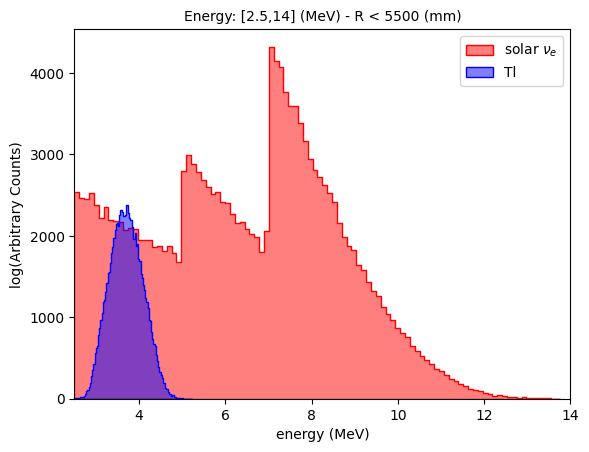

In [30]:
alpha = 0.5
sn.histplot(energy_sig, bins = 100, color = 'r', element = 'step', label = 'solar $ν_e$', alpha = alpha)
sn.histplot(energy_bkg, bins = 100, color = 'b', element = 'step', label = 'Tl', alpha = alpha)
plt.xlabel('energy (MeV)')
plt.ylabel('log(Arbitrary Counts)')
plt.legend(loc='best')
#plt.yscale('log')
plt.xlim(2.5,14)
#plt.yticks([])
plt.title('Energy: [2.5,14] (MeV) - R < 5500 (mm)', fontsize = 10)
#plt.savefig('figs/Optimized Models/10x10/Features transf. by StandardScaler/Nu_vs_Tl_spec.png', format = 'png', bbox_inches = 'tight')

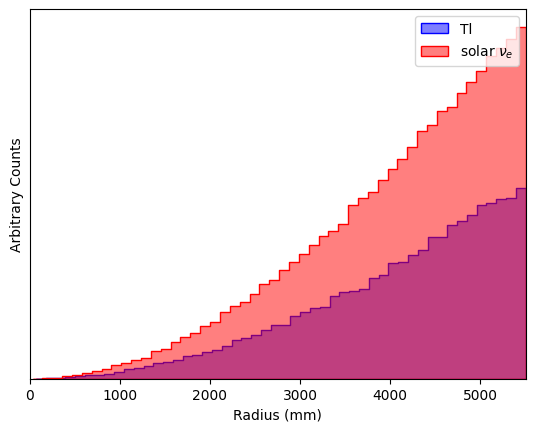

In [31]:
alpha = 0.5

sn.histplot(radi_bkg, bins = 50, color = 'b', element = 'step', label = 'Tl', alpha = alpha)
sn.histplot(radi_sig, bins = 50, color = 'r', element = 'step', label = 'solar $ν_e$', alpha = alpha)
plt.xlabel('Radius (mm)')
plt.ylabel('Arbitrary Counts')
plt.legend(loc='best')
#plt.yscale('log')
plt.xlim(0,5500)
plt.yticks([])
plt.show()

# 2 - Transformations

## 2.1 - Standard Scaler

- Problema de reescala de energia de neutrinos, colocandola dentro de energia de Talio -> Que es lo que realmente pasaria a diferenciarlas?

In [8]:
scaler_en_sig = StandardScaler()
scaler_en_bkg = StandardScaler()

scaler_rad_sig = StandardScaler()
scaler_rad_bkg = StandardScaler()

scaler_pix_sig = StandardScaler()
scaler_pix_bkg = StandardScaler()

#Energy
std_en_sig = scaler_en_sig.fit_transform(dataset_sig[['energy (MeV)']]).T[0]
std_en_bkg = scaler_en_bkg.fit_transform(dataset_bkg[['energy (MeV)']]).T[0]

#Radius
std_rad_sig = scaler_rad_sig.fit_transform(dataset_sig[['event radius (mm)']]).T[0]
std_rad_bkg = scaler_rad_bkg.fit_transform(dataset_bkg[['event radius (mm)']]).T[0]

#Pixels
std_pixels_sig = scaler_pix_sig.fit_transform(dataset_sig[['pixel value']]).T[0]
std_pixels_bkg = scaler_pix_bkg.fit_transform(dataset_bkg[['pixel value']]).T[0]

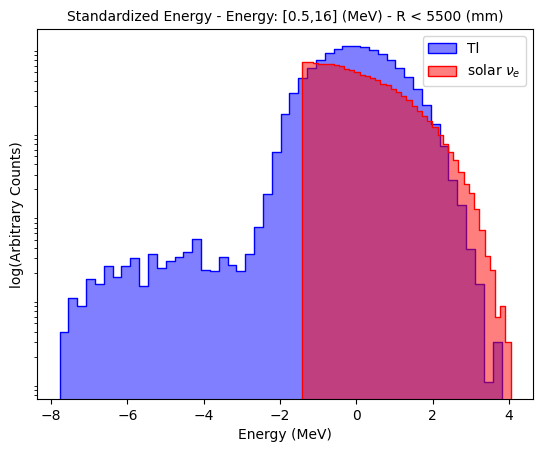

In [25]:
alpha = 0.5

sn.histplot(std_en_bkg, bins = 50, color = 'b', element = 'step', label = 'Tl', alpha = alpha)
sn.histplot(std_en_sig, bins = 40, color = 'r', element = 'step', label = 'solar $ν_e$', alpha = alpha)
plt.xlabel('Energy (MeV)')
plt.ylabel('log(Arbitrary Counts)')
plt.title('Standardized Energy - Energy: [0.5,16] (MeV) - R < 5500 (mm)', fontsize = 10)
plt.legend(loc='best')
plt.yscale('log')
plt.yticks([])
plt.savefig('figs/Optimized Models/10x10/Features transf. by StandardScaler/Std_Nu_vs_Tl_spec.png', format = 'png', bbox_inches = 'tight')

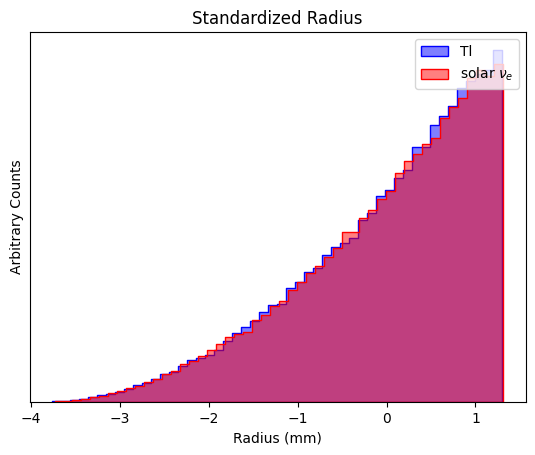

In [10]:
alpha = 0.5

sn.histplot(std_rad_bkg, bins = 50, color = 'b', element = 'step', label = 'Tl', alpha = alpha)
sn.histplot(std_rad_sig, bins = 50, color = 'r', element = 'step', label = 'solar $ν_e$', alpha = alpha)
plt.xlabel('Radius (mm)')
plt.ylabel('Arbitrary Counts')
plt.title('Standardized Radius', fontsize = 12)
plt.legend(loc='best')
#plt.yscale('log')
plt.yticks([])
plt.show()

### 2.1.1 - Inverse Standard Scaler

Recover the original data

In [11]:
org_en_sig = scaler_en_sig.inverse_transform([std_en_sig])[0]
org_en_bkg = scaler_en_bkg.inverse_transform([std_en_bkg])[0]

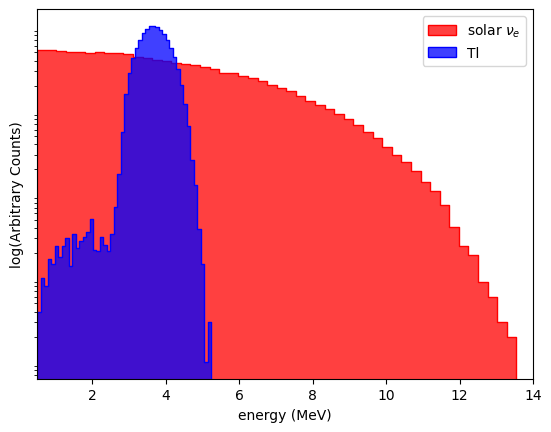

In [12]:
sn.histplot(org_en_sig, bins = 50, color = 'r', element = 'step', label = 'solar $ν_e$')
sn.histplot(org_en_bkg, bins = 50, color = 'b', element = 'step', label = 'Tl')
plt.xlabel('energy (MeV)')
plt.ylabel('log(Arbitrary Counts)')
plt.legend(loc='best')
plt.yscale('log')
plt.xlim(0.5,14)
plt.yticks([])
plt.show()

## 2.2 - Re-Weighting

Consiste en tomar cada count dentro de un bin de energia y calcular el peso inverto $1/frequency$, luego multiplicar los datos (dentro del intervalo) por el peso inverso correspondiente.

- No observo una distribución plana para energia de neutrinos. Tambien no es nada trivial saber que es lo que realmente diferencia energias de talio y de neutrinos solares...

In [218]:
bins_en_sig = 100000
bins_en_bkg = 10000
ener_freq_sig, energy_edges_sig = np.histogram(energy_sig, bins = bins_en_sig, density = True)
ener_freq_bkg, energy_edges_bkg = np.histogram(energy_bkg, bins = bins_en_bkg, density = True)

#inverse_weight_sig = 1/ener_freq_sig
#inverse_weight_sig /= np.sum(inverse_weight_sig)  #pesos normalizados

In [177]:
ener_freq_sig

array([0.05379934, 0.10759869, 0.10759869, ..., 0.        , 0.        ,
       0.05379934])

### 2.2.1 - Algoritmo de Re-Sampling

Dentro de cada bin_edge de energy, extraer los eventos  entre estos dos valores de energia y multiplicar por su peso inverso

In [219]:
energy_rew_sig = np.array([])   # reweighted energy
#Use pair of values in energy_edges_sig to filter the energy values of events between energy edges  

N_edges_sig = len(energy_edges_sig)

for i in range(N_edges_sig-1):
    #Extract energy bin edges
    edge_i = energy_edges_sig[i]
    edge_f = energy_edges_sig[i+1]

    #look for energies in data set between binned energy edge (condition with np.extract(condtion, array))
    #save filtered energy
    tempo_energy = np.extract((energy_sig >= edge_i) & (energy_sig <= edge_f), energy_sig) # create temporal energy list containing all energies between edge values (refresh when changing interval)
    #print(inverse_weight_sig[i])
    #now, operate over the energies with the inverse weight
    re_weight_values = tempo_energy*ener_freq_sig[i]
    energy_rew_sig = np.append(energy_rew_sig, re_weight_values)

<Axes: ylabel='Count'>

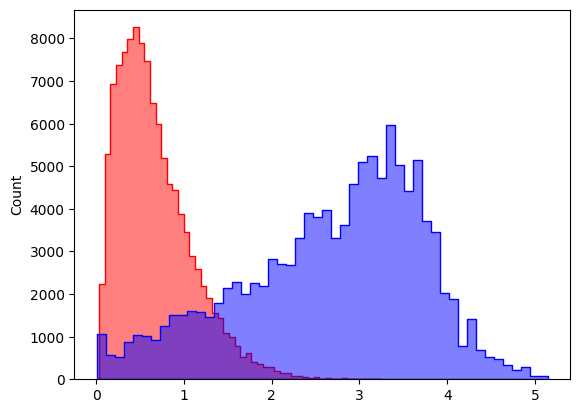

In [220]:
sn.histplot(energy_rew_sig, bins = 50 ,color = 'r', element = 'step', label = 'solar $ν_e$', alpha = alpha)
sn.histplot(energy_rew_bkg, bins = 50 ,color = 'b', element = 'step', label = '208-Tl', alpha = alpha)

## 2.3 - Re-sampling

Vamos a disminuir la cantidad de datos registrados para altas energias, intentado igualarlos a la cantidad de datos en energias bajas. Para tal usaremos el metodo de undersampling, que reduce el conjunto de datos de modo equilibrarlo atraves de un bootstrap.

## 2.4 - Estabilizar Distribucion de Energia en Counts

Usar np.random.choice(arr, size = max count, replace = False) para estabilizar el Nº de contajes en cada bin de energia. Metodo:

1) Primero definamos una energia minima a partir de la cual estabilizar (Emin = 5) y un maximo de contaje (max_count = 1700).
2) Usemos la informacion contenida en cada bin y extraemos las energias del dataset entero por partes usando los limites de los bin edges. Nos aseguramos que el NCounts = len(energy subset) < max_count, caso contrario tendremos problemas con np.random.choice().
3) Para cada subconjunto de energias, aplicar np.random.choice() para diminuir el numero de elementos en el array que constribuyen para counts.
4) Almacenar esta nueva informacion en un nuevo dataset de energia

<Axes: ylabel='Count'>

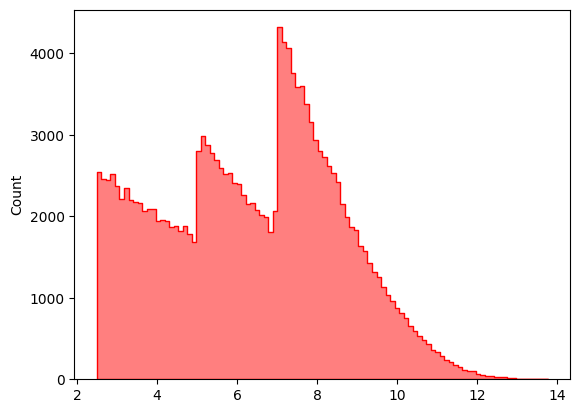

In [32]:
sn.histplot(energy_sig, bins = 100, color = 'r', element = 'step', label = 'solar $ν_e$', alpha = alpha)

In [33]:
bins = 100
max_count = 1700
n_counts, en_bin_edges = np.histogram(energy_sig, bins = bins)

reduced_solar_energy = np.array([])

for i in range(bins - 1):

    #Extract energy subsets to be reduced
    energy_edge_i = en_bin_edges[i]
    energy_edge_f = en_bin_edges[i+1] 
    sub_energy = np.extract((energy_sig >= energy_edge_i) & (energy_sig <= energy_edge_f), energy_sig)
    
    #1st, evaluate if the N_counts => max_counts. If not, save energies and pass to next loop
    if n_counts[i] < max_count:
        reduced_solar_energy = np.append(reduced_solar_energy, sub_energy)
        continue
        
    else:
        sub_reduced_energy = np.random.choice(sub_energy, size = max_count, replace = False)
        reduced_solar_energy = np.append(reduced_solar_energy, sub_reduced_energy)

reduced_solar_energy = np.unique(reduced_solar_energy)

<Axes: ylabel='Count'>

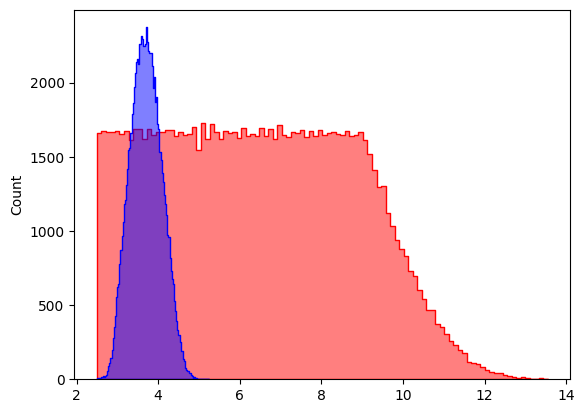

In [34]:
sn.histplot(reduced_solar_energy, bins = 100, color = 'r', element = 'step', label = 'solar $ν_e$', alpha = alpha)
sn.histplot(energy_bkg, bins = 100, color = 'b', element = 'step', label = 'Tl', alpha = alpha)

# 3 - Constuction of an Elegant DataSet

1) First, extract information compatible with the new distribution of Data (pixel, energy, radius)
   - 1.1) For this, use an algorithm which verifies where the reduced_solar_energy matches with the energy_sig, and extract indices,
2) Reestruture de PandasDataFrame, which each column correspond to a pixel value, energy,  radius,  value of solar label and value of bkg label.

## 3.1 - Extract solar event info which verifies non repeated energies

In [35]:
non_rep_index = np.array([], dtype = np.int32)   #indices which verify a non repeated value betweeen energy_sig and reduced energy

for energy_val in reduced_solar_energy:
    
    #indices where a repition is verified
    check_rep_en = np.where(energy_sig == energy_val)[0]

    #Extract only one event with different energy
    N_reps = len(check_rep_en)
    if N_reps > 1:
        non_rep_index = np.append(non_rep_index, check_rep_en[0])
    else:
        non_rep_index = np.append(non_rep_index, check_rep_en)


#Extract information from the complete dataset for solar nu
reduced_pixel_sig = split_pixel_ev_sig[non_rep_index]
reduced_en_sig = reduced_solar_energy
reduced_rad_sig = radi_sig[non_rep_index]

In [36]:
reduced_rad_sig

array([3730.21728516, 4625.42138672, 4015.82226562, ..., 4012.29882812,
       2613.85693359, 1967.98327637])

In [37]:
N_non_rep_en_eves = len(non_rep_index)
N_original_set = len(energy_sig)
N_bkg_eves = len(energy_bkg)

print('Nº de eventos de solar nu originales:', N_original_set)
print('Nº de eventos de solar nu con energia reducida:', N_non_rep_en_eves)
print('Nº de eventos de Tálio:', N_bkg_eves)

Nº de eventos de solar nu originales: 161410
Nº de eventos de solar nu con energia reducida: 116013
Nº de eventos de Tálio: 86799


## 3.2 - Prepare the Pandas DataFrame (NOTE: Thallium events are split into train dataset and test dataset)

In [38]:
#Solar Nu Part
image_shape = (10,10)
image_dim = image_shape[0]*image_shape[1]

N_pixel = reduced_pixel_sig.shape[1]

for i in range(N_pixel):
    locals()['pixel_' +str(i)] = reduced_pixel_sig[:,i]

#Construct Data Frame with the featrures value
data_sig = {}
df_sig = pd.DataFrame(data_sig)

for j in range(N_pixel):
    df_sig['pixel_'+str(j)] = locals()['pixel_' +str(j)]

#introduce new columns
#energy
df_sig['energy (MeV)'] = reduced_en_sig
#radius
df_sig['radius (mm)'] = reduced_rad_sig
#labels
df_sig['IsNu'] = np.ones(len(reduced_en_sig), dtype = np.int8)
df_sig['IsTl'] = np.zeros(len(reduced_en_sig), dtype = np.int8)

C:\Users\joanc\AppData\Local\Temp\ipykernel_16664\1922044989.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sig['energy (MeV)'] = reduced_en_sig
C:\Users\joanc\AppData\Local\Temp\ipykernel_16664\1922044989.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sig['radius (mm)'] = reduced_rad_sig
C:\Users\joanc\AppData\Local\Temp\ipykernel_16664\1922044989.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

In [43]:
df_sig

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99,energy (MeV),radius (mm),IsNu,IsTl
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.157895,...,0.111111,0.142857,0.100000,0.318182,0.100000,0.052632,2.500081,3730.217285,1,0
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.100000,...,0.090909,0.176471,0.052632,0.150000,0.185185,0.200000,2.500176,4625.421387,1,0
2,0.333333,0.0,0.000000,0.000000,0.111111,0.058824,0.000000,0.136364,0.111111,0.100000,...,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,2.500183,4015.822266,1,0
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.176471,...,0.375000,0.384615,0.318182,0.285714,0.277778,0.117647,2.500232,4519.230957,1,0
4,0.666667,0.0,1.000000,0.142857,0.000000,0.294118,0.090909,0.187500,0.181818,0.217391,...,0.000000,0.000000,0.090909,0.062500,0.045455,0.000000,2.500597,3809.948975,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116008,0.000000,0.0,0.857143,0.400000,0.515152,0.303571,0.322222,0.273585,0.256410,0.321429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.026786,13.431980,4042.929932,1,0
116009,1.000000,0.0,0.000000,0.000000,0.000000,0.024390,0.000000,0.028302,0.039062,0.054878,...,0.105263,0.024390,0.038961,0.122642,0.093750,0.060976,13.459017,4443.084473,1,0
116010,0.000000,0.0,0.500000,0.250000,0.521739,0.304348,0.346667,0.216495,0.215385,0.272727,...,0.000000,0.000000,0.040000,0.000000,0.015385,0.015152,13.460300,4012.298828,1,0
116011,0.000000,0.0,0.000000,0.000000,0.038462,0.051282,0.125000,0.080645,0.070423,0.096386,...,0.000000,0.102564,0.107143,0.032258,0.098592,0.084337,13.469332,2613.856934,1,0


In [44]:
#Thallium part

image_shape = (10,10)
image_dim = image_shape[0]*image_shape[1]

N_pixel = reduced_pixel_sig.shape[1]

for i in range(N_pixel):
    locals()['pixel_' +str(i)] = split_pixel_ev_bkg[:,i]

#Construct Data Frame with the featrures value
data_bkg = {}
df_bkg = pd.DataFrame(data_bkg)

for j in range(N_pixel):
    df_bkg['pixel_'+str(j)] = locals()['pixel_' +str(j)]

#introduce new columns
#energy
df_bkg['energy (MeV)'] = energy_bkg
#radius
df_bkg['radius (mm)'] = radi_bkg
#labels
df_bkg['IsNu'] = np.zeros(len(split_en_bkg), dtype = np.int8)
df_bkg['IsTl'] = np.ones(len(split_en_bkg), dtype = np.int8)

C:\Users\joanc\AppData\Local\Temp\ipykernel_16664\1813122934.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bkg['energy (MeV)'] = energy_bkg
C:\Users\joanc\AppData\Local\Temp\ipykernel_16664\1813122934.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bkg['radius (mm)'] = radi_bkg
C:\Users\joanc\AppData\Local\Temp\ipykernel_16664\1813122934.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

In [41]:
df_bkg

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99,energy (MeV),radius (mm),IsNu,IsTl
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121212,0.057143,...,0.000000,0.000000,0.086957,0.060606,0.090909,0.028571,3.729084,4063.217041,0,1
1,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.100000,0.037037,0.121951,0.146341,...,0.000000,0.000000,0.033333,0.037037,0.000000,0.000000,3.408692,4676.254883,0,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.062500,0.038462,...,0.375000,0.562500,0.360000,0.375000,0.375000,0.230769,4.074250,3978.343262,0,1
3,0.000000,0.000000,0.000000,0.000000,0.041667,0.028571,0.000000,0.030303,0.025000,0.088235,...,0.166667,0.000000,0.090909,0.151515,0.000000,0.058824,4.067628,5492.923828,0,1
4,0.000000,0.000000,0.250000,0.333333,0.250000,0.200000,0.173913,0.125000,0.257143,0.269231,...,0.083333,0.000000,0.000000,0.000000,0.057143,0.115385,3.520844,4797.333984,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86794,0.333333,0.333333,0.000000,0.363636,0.076923,0.200000,0.312500,0.307692,0.352941,0.333333,...,0.076923,0.000000,0.062500,0.000000,0.029412,0.033333,3.401728,3706.334229,0,1
86795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.052632,0.000000,...,0.187500,0.176471,0.227273,0.125000,0.184211,0.200000,3.775197,4565.794922,0,1
86796,0.000000,0.000000,0.000000,0.000000,0.000000,0.107143,0.068966,0.060606,0.075000,0.047619,...,0.000000,0.000000,0.034483,0.060606,0.050000,0.142857,3.494981,4677.101074,0,1
86797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.095238,0.022222,0.100000,...,0.000000,0.000000,0.035714,0.071429,0.000000,0.025000,3.132000,5455.660645,0,1


In [74]:
split_test_portion = 0.4
element_lim = round(df_bkg.shape[0]*split_test_portion)

df_bkg_test = (df_bkg.iloc[:element_lim,:].reset_index()).drop(columns = ['index'])
df_bkg_train = (df_bkg.iloc[element_lim + 1:,:].reset_index()).drop(columns = ['index'])
df_bkg_test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99,energy (MeV),radius (mm),IsNu,IsTl
0,0.0,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.121212,0.057143,...,0.000000,0.000000,0.086957,0.060606,0.090909,0.028571,3.729084,4063.217041,0,1
1,0.0,0.000,0.00,0.166667,0.000000,0.000000,0.100000,0.037037,0.121951,0.146341,...,0.000000,0.000000,0.033333,0.037037,0.000000,0.000000,3.408692,4676.254883,0,1
2,0.0,0.000,0.00,0.000000,0.000000,0.000000,0.040000,0.000000,0.062500,0.038462,...,0.375000,0.562500,0.360000,0.375000,0.375000,0.230769,4.074250,3978.343262,0,1
3,0.0,0.000,0.00,0.000000,0.041667,0.028571,0.000000,0.030303,0.025000,0.088235,...,0.166667,0.000000,0.090909,0.151515,0.000000,0.058824,4.067628,5492.923828,0,1
4,0.0,0.000,0.25,0.333333,0.250000,0.200000,0.173913,0.125000,0.257143,0.269231,...,0.083333,0.000000,0.000000,0.000000,0.057143,0.115385,3.520844,4797.333984,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34715,0.0,0.000,0.00,0.000000,0.000000,0.090909,0.000000,0.137931,0.088235,0.147059,...,0.000000,0.000000,0.090909,0.068966,0.029412,0.058824,3.186567,4124.720703,0,1
34716,0.0,0.000,0.00,0.000000,0.000000,0.080000,0.035714,0.034483,0.043478,0.000000,...,0.142857,0.120000,0.071429,0.000000,0.130435,0.081081,3.495162,4224.542969,0,1
34717,0.0,0.125,0.00,0.000000,0.058824,0.052632,0.033333,0.071429,0.051282,0.034483,...,0.000000,0.000000,0.033333,0.035714,0.000000,0.034483,3.025235,5435.269043,0,1
34718,0.0,0.000,0.00,0.000000,0.000000,0.000000,0.076923,0.029412,0.000000,0.035714,...,0.555556,0.363636,0.307692,0.294118,0.310345,0.178571,3.042890,3110.557861,0,1


### 3.2.1 - Observe the energy distribution of train energy

<Axes: ylabel='Count'>

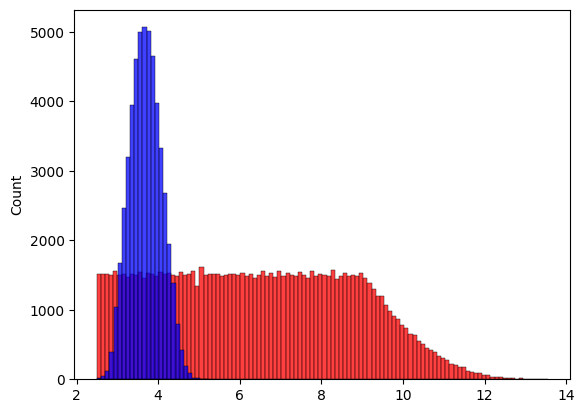

In [75]:
train_energy_sig = df_sig[['energy (MeV)']].to_numpy().T[0]
train_energy_bkg = df_bkg_train[['energy (MeV)']].to_numpy().T[0]

sn.histplot(train_energy_sig, binwidth = 0.1, color = 'r')
sn.histplot(train_energy_bkg, binwidth = 0.1, color = 'b')

In [76]:
# Concatenate the dataframe in a total reduced dataframe
df_reduced = pd.concat([df_sig, df_bkg_train], axis = 0)
df_reduced.to_csv("Data/High Stat/Elegant Data Frame Structure/train/df_reduced_5500_10_(2.5_14)_(-5_7).csv")

In [77]:
df_reduced

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99,energy (MeV),radius (mm),IsNu,IsTl
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.157895,...,0.111111,0.142857,0.100000,0.318182,0.100000,0.052632,2.500081,3730.217285,1,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.100000,...,0.090909,0.176471,0.052632,0.150000,0.185185,0.200000,2.500176,4625.421387,1,0
2,0.333333,0.000000,0.000000,0.000000,0.111111,0.058824,0.000000,0.136364,0.111111,0.100000,...,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,2.500183,4015.822266,1,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.176471,...,0.375000,0.384615,0.318182,0.285714,0.277778,0.117647,2.500232,4519.230957,1,0
4,0.666667,0.000000,1.000000,0.142857,0.000000,0.294118,0.090909,0.187500,0.181818,0.217391,...,0.000000,0.000000,0.090909,0.062500,0.045455,0.000000,2.500597,3809.948975,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52073,0.333333,0.333333,0.000000,0.363636,0.076923,0.200000,0.312500,0.307692,0.352941,0.333333,...,0.076923,0.000000,0.062500,0.000000,0.029412,0.033333,3.401728,3706.334229,0,1
52074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.052632,0.000000,...,0.187500,0.176471,0.227273,0.125000,0.184211,0.200000,3.775197,4565.794922,0,1
52075,0.000000,0.000000,0.000000,0.000000,0.000000,0.107143,0.068966,0.060606,0.075000,0.047619,...,0.000000,0.000000,0.034483,0.060606,0.050000,0.142857,3.494981,4677.101074,0,1
52076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.095238,0.022222,0.100000,...,0.000000,0.000000,0.035714,0.071429,0.000000,0.025000,3.132000,5455.660645,0,1


In [79]:
print('Number of solar events:', len(reduced_en_sig))
print('Number of Thallium events', len(train_energy_bkg))

Number of solar events: 116013
Number of Thallium events 52078


## * Construir DataSet de Teste (solar nu + Tl)

Esta sección esta dedicada a construir un dataset de teste, con el espectro de energia real de neutrinos solares y de Tálio

1) El dataset de teste de talio ya esta construido: df_bkg_test
2) Falta extraer el dataset de teste de una simulación de Solar_nu y concatenar al dataset df_bkg_test

In [84]:
image_dim = image_shape[0]*image_shape[1]

df_solar_test = pd.read_csv("Data/High Stat/OnlySolarDF/df_solar6_5500_10_(2.5_14)_(-5_7).csv").drop(columns = ['Unnamed: 0'])

#Separate Features for signal and background
pixel_value_sig = (df_solar_test['pixel value']).to_numpy()
energy_sig = (df_solar_test['energy (MeV)']).to_numpy()
radi_sig = (df_solar_test['event radius (mm)']).to_numpy()

# Eliminar redundancia entre datos dentro del mismo evento (energia y radio)

# Ordenar data set por entradas de eventos: separar pixeles, energia y radios
#split_dim = image_dim[0]*image_dim[1]

split_pixel_ev_sig = np.array(np.split(pixel_value_sig, len(pixel_value_sig) // split_dim))
split_en_sig = np.array(np.split(energy_sig, len(energy_sig) // split_dim))
split_rad_sig = np.array(np.split(radi_sig, len(radi_sig) // split_dim))

#deberan coincidir con split_pixel_ev_sig.shape[0]

single_en_ev_sig = []
single_rad_ev_sig = []

dim_en_sig = split_en_sig.shape[0]

dim_en_bkg = split_en_bkg.shape[0]

for i, j in zip(range(dim_en_sig), range(dim_rad_sig)):
    single_en_ev_sig.append(split_en_sig[i][0])
    single_rad_ev_sig.append(split_rad_sig[j][0])


energy_sig = np.array(single_en_ev_sig)
radi_sig = np.array(single_rad_ev_sig)

Construir DataFrame

In [85]:
image_dim = image_shape[0]*image_shape[1]

N_pixel = split_pixel_ev_sig.shape[1]

#define each pixel value
for i in range(N_pixel):
    locals()['pixel_' +str(i)] = split_pixel_ev_sig[:,i]

#Construct Data Frame with the featrures value
data_sig_test = {}
df_sig_test = pd.DataFrame(data_sig_test)

#adding columns as pixels [pixel_0, pixel_1, ...]
for j in range(N_pixel):
    df_sig_test['pixel_'+str(j)] = locals()['pixel_' +str(j)]

#introduce new columns
#energy
df_sig_test['energy (MeV)'] = energy_sig
#radius
df_sig_test['radius (mm)'] = radi_sig
#labels
df_sig_test['IsNu'] = np.ones(len(energy_sig), dtype = np.int8)
df_sig_test['IsTl'] = np.zeros(len(energy_sig), dtype = np.int8)

C:\Users\joanc\AppData\Local\Temp\ipykernel_16664\1727326418.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sig_test['energy (MeV)'] = energy_sig
C:\Users\joanc\AppData\Local\Temp\ipykernel_16664\1727326418.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sig_test['radius (mm)'] = radi_sig
C:\Users\joanc\AppData\Local\Temp\ipykernel_16664\1727326418.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

In [87]:
df_sig_test.shape

(52251, 104)

In [88]:
df_bkg_test.shape

(34720, 104)

Igualar Nº de Eventos

In [89]:
#Nº de eventos:
N_solar_test  = df_sig_test.shape[0]
N_tl_test = df_bkg_test.shape[0]

df_bkg_test = (df_bkg.iloc[:element_lim,:].reset_index()).drop(columns = ['index'])

if N_solar_test > N_tl_test:
    df_sig_test = (df_sig_test.iloc[:N_tl_test, :].reset_index()).drop(columns = ['index'])

else:
    df_bkg_test = (df_bkg_test.iloc[:N_solar_test, :].reset_index()).drop(columns = ['index'])

<Axes: ylabel='Count'>

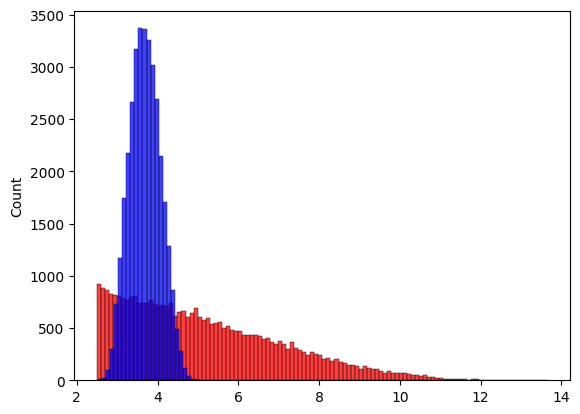

In [92]:
test_energy_sig = df_sig_test[['energy (MeV)']].to_numpy().T[0]
test_energy_bkg = df_bkg_test[['energy (MeV)']].to_numpy().T[0]

sn.histplot(test_energy_sig, binwidth = 0.1, color = 'r')
sn.histplot(test_energy_bkg, binwidth = 0.1, color = 'b')

Observar la distribución de energias

Guardar Dataset

In [95]:
# Concatenate the dataframe in a total reduced dataframe
df_test = pd.concat([df_sig_test, df_bkg_test], axis = 0)
df_test.to_csv("Data/High Stat/Elegant Data Frame Structure/test/df_test_5500_10_(2.5_14)_(-5_7).csv")

# 4 - Transformation of Reduced Data

In [184]:
#Load Data

df_read = pd.read_csv("Data/High Stat/Elegant Data Frame Structure/train/df_reduced_5500_10_(2.5_14)_(-5_7).csv")
df_read = df_read.drop(columns=['Unnamed: 0'])

pixel_pattern = r'^pixel_\d+$'

# 1ero, separar dataset de signal and background
data_sig = (df_read[df_read['IsNu'] == 1])
data_bkg = (df_read[df_read['IsTl'] == 1])

# Separar Features
pixels_sig = dataset_sig.filter(regex=pixel_pattern)
energy_sig = pd.DataFrame(data_sig, columns = ['energy (MeV)'])
radi_sig = pd.DataFrame(data_sig, columns = ['radius (mm)'])
label_sig = pd.DataFrame(data_sig, columns = ['IsNu', 'IsTl'])

pixels_bkg = dataset_bkg.filter(regex=pixel_pattern)
energy_bkg = pd.DataFrame(data_bkg, columns = ['energy (MeV)'])
radi_bkg = pd.DataFrame(data_bkg, columns = ['radius (mm)'])
label_bkg = pd.DataFrame(data_bkg, columns = ['IsNu', 'IsTl'])

## 4.1 - Robust Scaler

In [182]:
scaler_en_sig = RobustScaler()
scaler_en_bkg = RobustScaler()

scaler_rad_sig = RobustScaler()
scaler_rad_bkg = RobustScaler()

scaler_pix_sig = RobustScaler()
scaler_pix_bkg = RobustScaler()

#Energy
std_en_sig = scaler_en_sig.fit_transform(data_sig[['energy (MeV)']]).T[0]
std_en_bkg = scaler_en_bkg.fit_transform(data_bkg[['energy (MeV)']]).T[0]

#Radius
std_rad_sig = scaler_rad_sig.fit_transform(data_sig[['radius (mm)']]).T[0]
std_rad_bkg = scaler_rad_bkg.fit_transform(data_bkg[['radius (mm)']]).T[0]

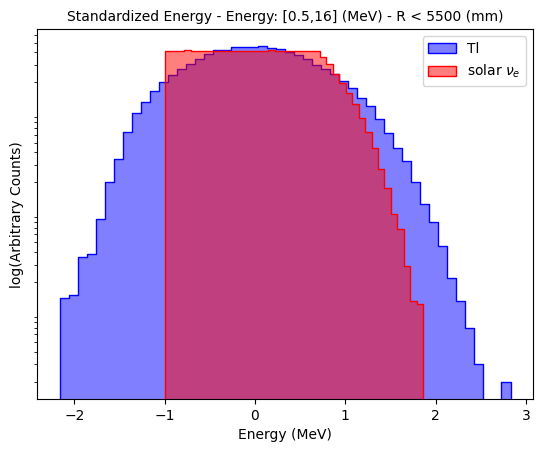

In [183]:
alpha = 0.5

sn.histplot(std_en_bkg, bins = 50, color = 'b', element = 'step', label = 'Tl', alpha = alpha)
sn.histplot(std_en_sig, bins = 40, color = 'r', element = 'step', label = 'solar $ν_e$', alpha = alpha)
plt.xlabel('Energy (MeV)')
plt.ylabel('log(Arbitrary Counts)')
plt.title('Standardized Energy - Energy: [0.5,16] (MeV) - R < 5500 (mm)', fontsize = 10)
plt.legend(loc='best')
plt.yscale('log')
plt.yticks([])
#plt.savefig('figs/Optimized Models/10x10/Features transf. by StandardScaler/Std_Nu_vs_Tl_spec.png', format = 'png', bbox_inches = 'tight')

([], [])

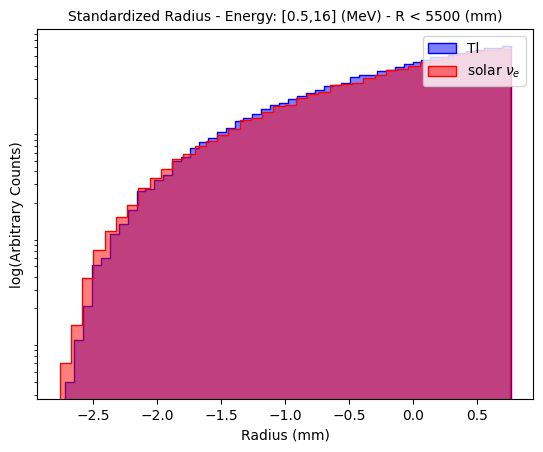

In [185]:
alpha = 0.5

sn.histplot(std_rad_sig, bins = 50, color = 'b', element = 'step', label = 'Tl', alpha = alpha)
sn.histplot(std_rad_bkg, bins = 40, color = 'r', element = 'step', label = 'solar $ν_e$', alpha = alpha)
plt.xlabel('Radius (mm)')
plt.ylabel('log(Arbitrary Counts)')
plt.title('Standardized Radius - Energy: [0.5,16] (MeV) - R < 5500 (mm)', fontsize = 10)
plt.legend(loc='best')
plt.yscale('log')
plt.yticks([])
#plt.savefig('figs/Optimized Models/10x10/Features transf. by StandardScaler/Std_Nu_vs_Tl_spec.png', format = 'png', bbox_inches = 'tight')

## 4.2 - MinMax

In [233]:
#Energy: MinMax Scaler

MinMax_en_sig = MinMaxScaler()
MinMax_en_bkg = MinMaxScaler()

MinMax_rad_sig = MinMaxScaler()
MinMax_rad_bkg = MinMaxScaler()

#Energy
MinMax_en_sig = MinMax_en_sig.fit_transform(data_sig[['energy (MeV)']]).T[0]
MinMax_en_bkg = MinMax_en_bkg.fit_transform(data_bkg[['energy (MeV)']]).T[0]

#Radius
MinMax_rad_sig = MinMax_rad_sig.fit_transform(data_sig[['radius (mm)']]).T[0]
MinMax_rad_bkg = MinMax_rad_bkg.fit_transform(data_bkg[['radius (mm)']]).T[0]

#Radius: Normalization of the sphere generated by the event radius by the sphere of the radial cut
vol = 5500**3
volnorm_rad_sig = (data_sig[['radius (mm)']]**3/vol).to_numpy().T[0]
volnorm_rad_bkg = (data_bkg[['radius (mm)']]**3/vol).to_numpy().T[0]

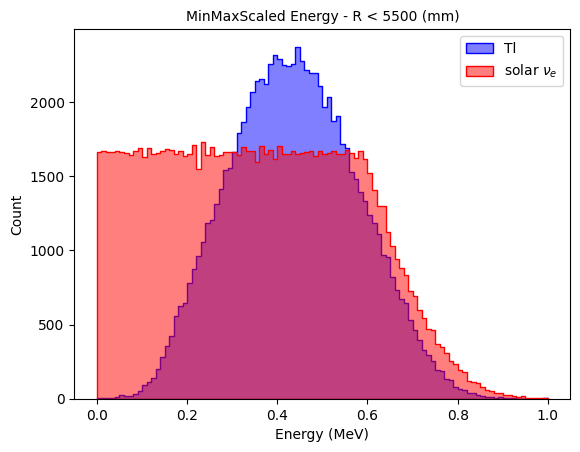

In [220]:
alpha = 0.5

sn.histplot(MinMax_en_bkg, bins = 100, color = 'b', element = 'step', label = 'Tl', alpha = alpha)
sn.histplot(MinMax_en_sig, bins = 100, color = 'r', element = 'step', label = 'solar $ν_e$', alpha = alpha)
plt.xlabel('Energy (MeV)')
#plt.ylabel('log(Arbitrary Counts)')
plt.title('MinMaxScaled Energy - R < 5500 (mm)', fontsize = 10)
plt.legend(loc='best')
#plt.yscale('log')
#plt.yticks([])
#plt.savefig('figs/Optimized Models/10x10/Features transf. by StandardScaler/Std_Nu_vs_Tl_spec.png', format = 'png', bbox_inches = 'tight')

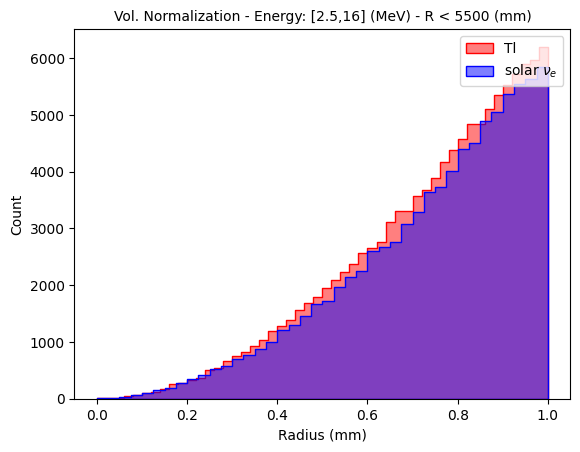

In [223]:
alpha = 0.5

sn.histplot(MinMax_rad_sig, bins = 50, color = 'r', element = 'step', label = 'Tl', alpha = alpha)
sn.histplot(MinMax_rad_bkg, bins = 40, color = 'b', element = 'step', label = 'solar $ν_e$', alpha = alpha)
plt.xlabel('Radius (mm)')
#plt.ylabel('log(Arbitrary Counts)')
plt.title('Vol. Normalization - Energy: [2.5,14] (MeV) - R < 5500 (mm)', fontsize = 10)
plt.legend(loc='best')
#plt.yscale('log')
#plt.yticks([])
#plt.savefig('figs/Optimized Models/10x10/Features transf. by StandardScaler/Std_Nu_vs_Tl_spec.png', format = 'png', bbox_inches = 'tight')

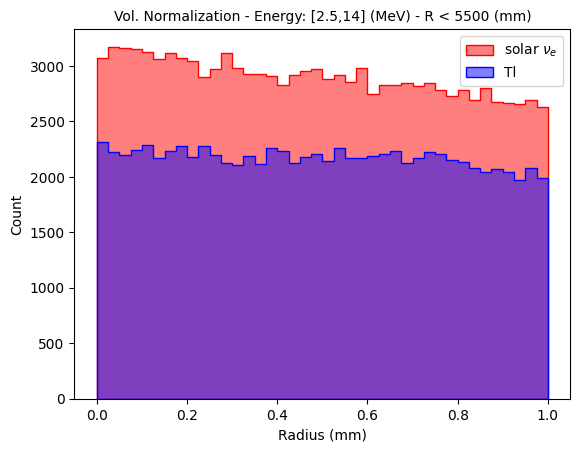

In [239]:
alpha = 0.5
bins = 40

sn.histplot(volnorm_rad_sig, bins = bins, color = 'r', element = 'step', label = 'solar $ν_e$', alpha = alpha)
sn.histplot(volnorm_rad_bkg, bins = bins, color = 'b', element = 'step', label = 'Tl', alpha = alpha)
plt.xlabel('Radius (mm)')
#plt.ylabel('log(Arbitrary Counts)')
plt.title('Vol. Normalization - Energy: [2.5,14] (MeV) - R < 5500 (mm)', fontsize = 10)
plt.legend(loc='best')
#plt.yscale('log')
#plt.yticks([])
#plt.savefig('figs/Optimized Models/10x10/Features transf. by StandardScaler/Std_Nu_vs_Tl_spec.png', format = 'png', bbox_inches = 'tight')

## 4.3 - Normalizer